<h2 align='center'>  Regresión Logística </h2> 

## Grafica

In [9]:
import numpy as np
from matplotlib import pyplot as plt

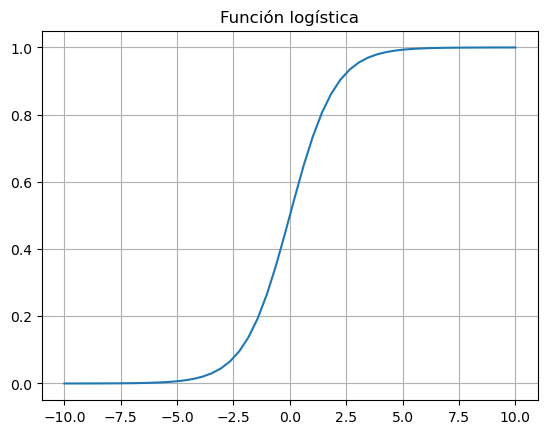

In [2]:
x = np.linspace(-10,10)
y = 1/(1+np.exp(-x))
plt.plot(x,y)
plt.title('Función logística')
plt.grid()
plt.axis
plt.show()

## Tipos de modelos de Regresión Logística

* **Regresión Logística Binaria:** la variable objetivo tiene solo dos resultados posible, Llueve o NO Llueve, Sube o Baja.
* **Regresión Logística Multinomial:** la variable objetivo tiene tres o más categorías nominales, como predecir el tipo de vino.
* **Regresión Logística Ordinal:** la variable objetivo tiene tres o más categorías ordinales, como clasificar un restaurante o un producto del 1 al 5

# Jugar con BDD

In [56]:
import pandas as pd

In [57]:
#dataframe = pd.read_csv('../bdd/usuarios_win_mac_lin.csv')
dataframe = pd.read_excel('../bdd/bdd_acv1.xlsx')

### Dataset

In [58]:
dataframe.head(10)

,Unnamed: 0,Edad,Sexo,Antecedentes mórbidos,Periodo de ventana (en horas ),Fribinólisis,Saturación de oxigeno al ingreso,Temperatura al ingreso,Frecuencia cardíaca al ingreso,Presión arterial sistólica al ingreso,...,INR,TTPK,Tiempo protombina,NIHSS puntaje al alta,mRS puntaje ingreso,NIHSS puntaje ingreso,Unnamed: 37,Functional outcome numérico,Functional outcome,Código de identificación
0,NaN,61.0,Hombre,"Hipertensión Arterial, Diabetes Mellitus",24,No efectuada,NaN,NaN,NaN,119.0,...,1.30,28.0,15.0,NaN,0.0,NaN,1.0,0,Bueno,8082227-8
1,NaN,64.0,Hombre,Hipertensión Arterial,3,Efectuada,NaN,NaN,NaN,134.0,...,1.08,26.9,11.9,9.0,0.0,11.0,1.0,0,Bueno,7494106-0
2,NaN,69.0,Mujer,"Hipertensión Arterial, Otros",12,No efectuada,NaN,NaN,NaN,111.0,...,0.97,27.1,10.8,0.0,0.0,0.0,1.0,0,Bueno,7456922-6
3,NaN,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.23,34.4,12.5,NaN,NaN,NaN,NaN,0,NaN,NaN
4,NaN,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.96,29.4,9.8,NaN,NaN,NaN,NaN,0,NaN,NaN
5,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.10,29.4,8.4,NaN,NaN,NaN,NaN,0,NaN,NaN
6,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.30,32.8,13.2,NaN,NaN,NaN,NaN,0,NaN,NaN
7,NaN,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.03,25.7,10.5,NaN,NaN,NaN,NaN,0,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.09,36.5,11.8,NaN,NaN,NaN,NaN,0,NaN,NaN
9,NaN,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.99,29.4,10.9,NaN,NaN,NaN,NaN,0,NaN,NaN


In [59]:
dataframe.iloc[-1] # Última fila

Unnamed: 0                                                         NaN
Edad                                                              73.0
Sexo                                                            Hombre
Antecedentes mórbidos                     Hipertensión Arterial, Otros
Periodo de ventana (en horas )                                     >12
Fribinólisis                                              No efectuada
Saturación de oxigeno al ingreso                                   NaN
Temperatura al ingreso                                             NaN
Frecuencia cardíaca al ingreso                                     NaN
Presión arterial sistólica al ingreso                            157.0
Presión arterial diastólica al ingreso                            68.0
Hemoglobina                                                       15.5
Hematocrito                                                       45.3
Plaquetas                                                          228
Leucoc

In [72]:
columnas = ['PCR','INR', 'TTPK', 'Tiempo protombina', 'Functional outcome numérico'] # Columnas a trabajar
dataset = dataframe[[*columnas]]
dataset.head(5)

,PCR,INR,TTPK,Tiempo protombina,Functional outcome numérico
0,16.00,1.30,28.0,15.0,0
1,4.10,1.08,26.9,11.9,0
2,10.10,0.97,27.1,10.8,0
3,6.70,1.23,34.4,12.5,0
4,0.54,0.96,29.4,9.8,0


### Numero Funcional de Salida

In [73]:
print(dataset.groupby('Functional outcome numérico').size())

Functional outcome numérico
0    97
1    66
dtype: int64


C:\Users\Abraham\AppData\Local\Temp\ipykernel_179728\3302411513.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataset.drop(['Functional outcome numérico'],1).hist()


<Figure size 1700x500 with 0 Axes>

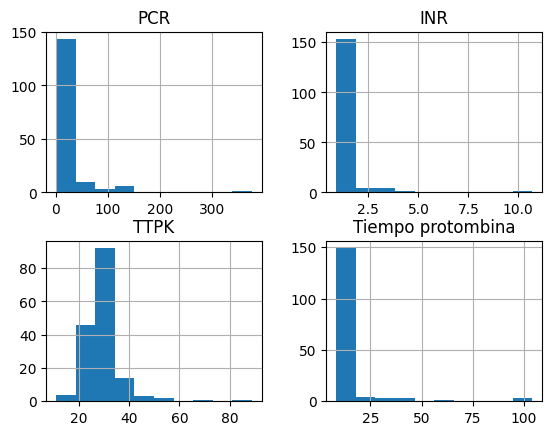

In [74]:
plt.figure(figsize=(17,5))
dataset.drop(['Functional outcome numérico'],1).hist()
plt.show()

# Funciona para pocas columnas, pero es util para ver como estan respecto a la columna tomada.Distribucion respecto a la clase

# Modelo

In [75]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split #separa las metricas
from sklearn import metrics

In [76]:
modelo_RL = linear_model.LogisticRegression(solver='lbfgs', max_iter=1000)

In [77]:
X = dataset.drop('Functional outcome numérico',axis=1)

In [78]:
Y = dataset['Functional outcome numérico']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=.80,random_state=1)

In [80]:
modelo_RL.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

## Prediccion

In [81]:
prediccion = modelo_RL.predict(X_test)

## Evaluacion del Modelo

In [84]:
print("Matriz de Confusión :\n",metrics.confusion_matrix(y_test, prediccion))
# Para saber los aciertos que tiene

Matriz de Confusión :
 [[16  1]
 [15  1]]


In [85]:
print("Tasa de acierto: {:4f}".format(metrics.accuracy_score(y_test,prediccion)))

Tasa de acierto: 0.515152


In [86]:
print('Reporte de clasificacion:\n')
print(metrics.classification_report(y_test, prediccion))

Reporte de clasificacion:

              precision    recall  f1-score   support

           0       0.52      0.94      0.67        17
           1       0.50      0.06      0.11        16

    accuracy                           0.52        33
   macro avg       0.51      0.50      0.39        33
weighted avg       0.51      0.52      0.40        33



## Hasta aqui